In [1]:
from prawn_predictor import DataProcessor
from fbprophet import Prophet
import numpy as np
import pandas as pd

In [2]:
model = Prophet(holidays_prior_scale=1, changepoint_prior_scale=0.5,
                seasonality_mode='multiplicative',
                #changepoints=['2020-03-01'],
                growth='logistic',
                yearly_seasonality=False,
                daily_seasonality=False,
                weekly_seasonality=False)
model.add_seasonality(name='halfly', period=210, fourier_order=5)
#model.add_country_holidays('US')


In [3]:
data_processor = DataProcessor()
df = data_processor.df
df = df[df['GeoID'] == 'United States / New York'].copy()
df['ds'] = df['Date']
df['y'] = df['ConfirmedCases']+1
cap = 1000000
df['cap'] = cap
df['floor'] = 0
df.tail()
df[df['NewCases']==0]

['Brazil' 'United Kingdom' 'United States']


,CountryName,RegionName,GeoID,Date,ConfirmedCases,ConfirmedDeaths,Population,C1_School closing,C2_Workplace closing,C3_Cancel public events,...,SmoothNewCases,SmoothNewDeaths,CaseRatio,DeathRatio,ProportionInfected,PredictionRatio,ds,y,cap,floor
79037,United States,New York,United States / New York,2020-01-22,0.0,0.0,19453561.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,2020-01-22,1.0,1000000,0
79038,United States,New York,United States / New York,2020-01-23,0.0,0.0,19453561.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,2020-01-23,1.0,1000000,0
79039,United States,New York,United States / New York,2020-01-24,0.0,0.0,19453561.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,2020-01-24,1.0,1000000,0
79040,United States,New York,United States / New York,2020-01-25,0.0,0.0,19453561.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,2020-01-25,1.0,1000000,0
79041,United States,New York,United States / New York,2020-01-26,0.0,0.0,19453561.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,2020-01-26,1.0,1000000,0
79042,United States,New York,United States / New York,2020-01-27,0.0,0.0,19453561.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,2020-01-27,1.0,1000000,0
79043,United States,New York,United States / New York,2020-01-28,0.0,0.0,19453561.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,2020-01-28,1.0,1000000,0
79044,United States,New York,United States / New York,2020-01-29,0.0,0.0,19453561.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,2020-01-29,1.0,1000000,0
79045,United States,New York,United States / New York,2020-01-30,0.0,0.0,19453561.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,2020-01-30,1.0,1000000,0
79046,United States,New York,United States / New York,2020-01-31,0.0,0.0,19453561.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,2020-01-31,1.0,1000000,0


In [4]:
NPI_COLUMNS = ['C1_School closing',
               'C2_Workplace closing',
               'C3_Cancel public events',
               'C4_Restrictions on gatherings',
               'C5_Close public transport',
               'C6_Stay at home requirements',
               'C7_Restrictions on internal movement',
               'C8_International travel controls',
               'H1_Public information campaigns',
               'H2_Testing policy',
               'H3_Contact tracing',
               'H6_Facial Coverings'
              ]
for column in NPI_COLUMNS:
    model.add_regressor(column, prior_scale=0.005, standardize=True, mode='multiplicative')
    #model.add_regressor(column, prior_scale=0.005, standardize=True, mode='additive')

In [5]:
np.concatenate([df['C1_School closing'],np.random.randint(0, 5, size=30)], axis=0).shape

(339,)

In [6]:
model.fit(df)

In [14]:
from fbprophet.diagnostics import cross_validation
cutoffs = pd.to_datetime(['2020-11-15'])
df_cv = cross_validation(model,cutoffs=cutoffs , horizon = '30 days')
df_cv['delta_y'] =df_cv['yhat']-df_cv['y']
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,delta_y
0,2020-11-16,564661.573197,562107.765047,566885.664310,563691.0,2020-11-15,970.573197
1,2020-11-17,569740.222471,567171.186619,572320.662266,568779.0,2020-11-15,961.222471
2,2020-11-18,574931.495858,572084.649938,577766.197824,574073.0,2020-11-15,858.495858
3,2020-11-19,580217.809954,577380.591365,583691.007085,579383.0,2020-11-15,834.809954
4,2020-11-20,585580.512252,582223.914967,590062.737378,584851.0,2020-11-15,729.512252
5,2020-11-21,591000.127241,586789.092677,596549.423925,590824.0,2020-11-15,176.127241
6,2020-11-22,596456.615864,590151.099574,604983.214987,596215.0,2020-11-15,241.615864
7,2020-11-23,601929.643642,593850.123010,612109.351388,602121.0,2020-11-15,-191.356358
8,2020-11-24,607398.852624,597012.074843,620927.931202,607002.0,2020-11-15,396.852624
9,2020-11-25,612844.132217,599610.141732,629038.198766,613267.0,2020-11-15,-422.867783


In [8]:
from fbprophet.diagnostics import performance_metrics

df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,942012.330012,970.573197,970.573197,0.001722,0.001722,1.0
1,2 days,923948.638073,961.222471,961.222471,0.001690,0.001690,1.0
2,3 days,737015.139050,858.495858,858.495858,0.001495,0.001495,1.0
3,4 days,696907.659611,834.809954,834.809954,0.001441,0.001441,1.0
4,5 days,532188.125808,729.512252,729.512252,0.001247,0.001247,1.0
5,6 days,31020.805197,176.127241,176.127241,0.000298,0.000298,1.0
6,7 days,58378.225816,241.615864,241.615864,0.000405,0.000405,1.0
7,8 days,36617.255679,191.356358,191.356358,0.000318,0.000318,1.0
8,9 days,157492.004802,396.852624,396.852624,0.000654,0.000654,1.0
9,10 days,178817.161499,422.867783,422.867783,0.000690,0.000690,1.0


In [9]:
future = model.make_future_dataframe(periods=30)
future['cap'] = cap
future['floor'] = 0
print(future.shape)
for column in NPI_COLUMNS:
    #future[column] = np.concatenate([df[column],np.random.randint(0, 5, size=30)], axis=0)
    future[column] = np.concatenate([df[column],np.array([5]*30)], axis=0)
future.tail()

(339, 3)


,ds,cap,floor,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings
334,2020-12-21,1000000,0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
335,2020-12-22,1000000,0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
336,2020-12-23,1000000,0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
337,2020-12-24,1000000,0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
338,2020-12-25,1000000,0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [10]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,38.532836,-2514.856251,2557.409174
1,2020-01-23,40.516420,-2468.780484,2600.663857
2,2020-01-24,42.607319,-2558.320092,2574.410150
3,2020-01-25,44.811586,-2578.085622,2660.350134
4,2020-01-26,47.135558,-2460.200790,2458.554384


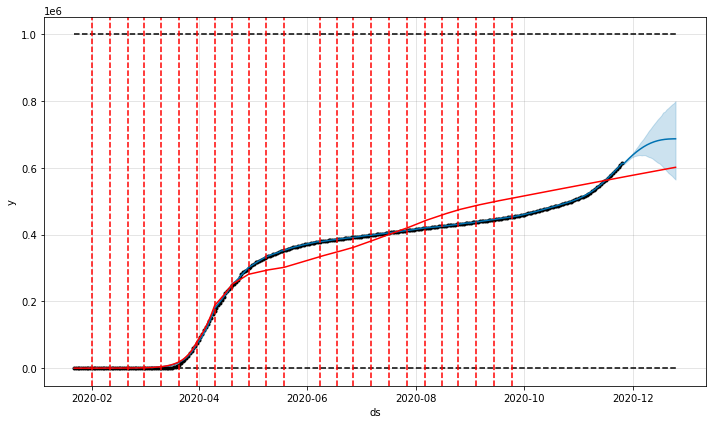

In [11]:
from fbprophet.plot import add_changepoints_to_plot
fig1 = model.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), model, forecast)

/Users/brook/venvs/covid-xprize/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/Users/brook/venvs/covid-xprize/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


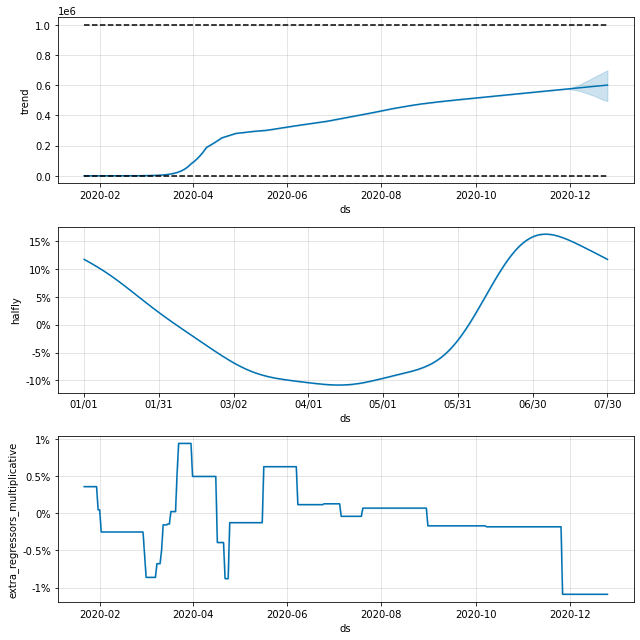

In [12]:
fig2 = model.plot_components(forecast)